In [73]:
import netCDF4
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.dates as dates
%matplotlib inline

In [15]:
print(ncf_obj.variables['detection_status'].ncattrs())
print(ncf_obj.variables['detection_status'].flag_meanings)


[u'long_name', u'units', u'missing_value', u'flag_values', u'flag_meanings', u'flag_0_description', u'flag_1_description', u'flag_2_description', u'flag_3_description', u'flag_4_description', u'flag_5_description']
No_significant_backscatter 
One_cloud_base_detected 
Two_cloud_bases_detected 
Three_cloud_bases detected
Full_obscuration_determined_but_no_cloud_base_detected
Some_obscuration_detected_but_determined_to_be_transparent


In [48]:
infile = '/data/PBL_vap/sgpceilpblhtC1.a0.20150722.000000.cdf'
infile2 = '/data/PBL_vap/sgpceilpblhtC1.a0.20150723.000000.cdf'

ncf_obj = netCDF4.MFDataset('/data/PBL_vap/sgpceilpblhtC1.a0.2015072*')


In [49]:
print(ncf_obj.variables.keys())

[u'base_time', u'time_offset', u'time', u'sample_count', u'bl_height_1', u'bl_index_1', u'bl_height_2', u'bl_index_2', u'bl_height_3', u'bl_index_3', u'detection_status', u'first_cbh', u'second_cbh', u'third_cbh', u'lat', u'lon', u'alt']


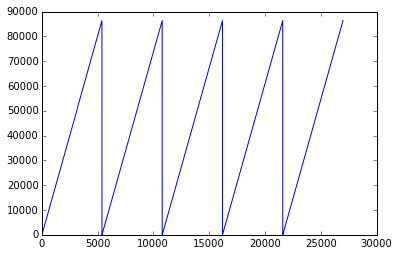

In [52]:
plt.plot(ncf_obj.variables['time'][:])

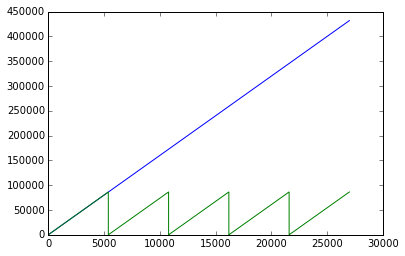

In [77]:
newtime = np.unwrap(ncf_obj.variables['time'][:], discont=ncf_obj.variables['time'][:].max())
plt.plot(newtime)
plt.plot(ncf_obj.variables['time'][:])

In [78]:
pydates = md.date2num(netCDF4.num2date(newtime, ncf_obj.variables['time'].units))
masked_height_1 = np.ma.masked_where(ncf_obj.variables['detection_status'][:] == 0, 
                                     ncf_obj.variables['bl_height_1'][:])
masked_height_2 = np.ma.masked_where(ncf_obj.variables['detection_status'][:] == 0, 
                                     ncf_obj.variables['bl_height_2'][:])
masked_height_3 = np.ma.masked_where(ncf_obj.variables['detection_status'][:] == 0, 
                                     ncf_obj.variables['bl_height_3'][:])



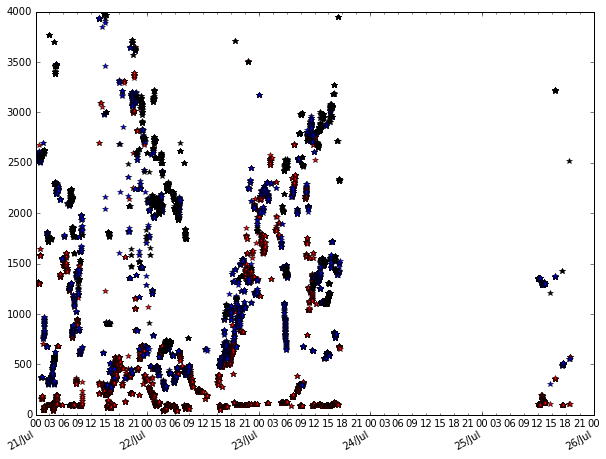

In [79]:
fig = plt.figure(figsize = [10,8])
plt.plot(pydates, masked_height_1, 'r*')
plt.plot(pydates, masked_height_2, 'b*')
plt.plot(pydates, masked_height_3, 'k*')

ax = plt.gca()
ax.xaxis_date()
plt.gcf().autofmt_xdate()

ax = plt.gca()
# set date ticks to something sensible:
xax = ax.get_xaxis()
xax.set_major_locator(dates.DayLocator())
xax.set_major_formatter(dates.DateFormatter('%d/%b'))

xax.set_minor_locator(dates.HourLocator(byhour=range(0,24,3)))
xax.set_minor_formatter(dates.DateFormatter('%H'))
xax.set_tick_params(which='major', pad=15)


In [30]:
print(np.where(ncf_obj.variables['detection_status'][:] == 0)[0].shape)

(1026,)
